In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


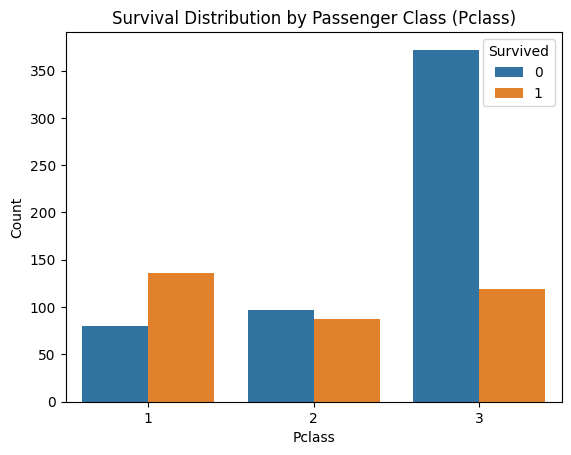

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the relationship between Pclass and Survived
sns.countplot(data=df_train, x='Pclass', hue='Survived')
plt.title("Survival Distribution by Passenger Class (Pclass)")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()


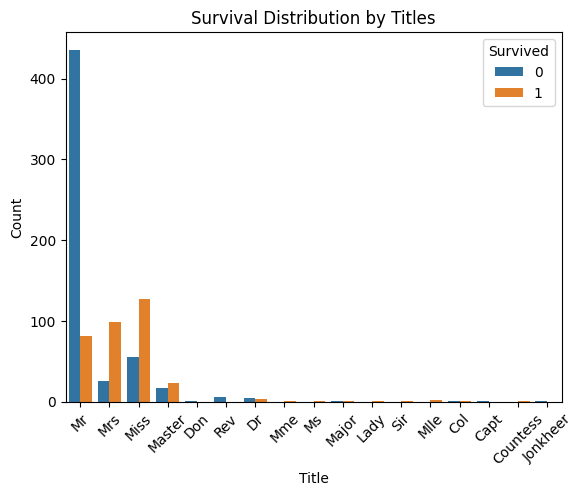

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# titles from the 'Name' column and create a new 'Title' column
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.')

#  countplot to visualize the relationship between titles and Survived
sns.countplot(data=df_train, x='Title', hue='Survived')
plt.title("Survival Distribution by Titles")
plt.xlabel("Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


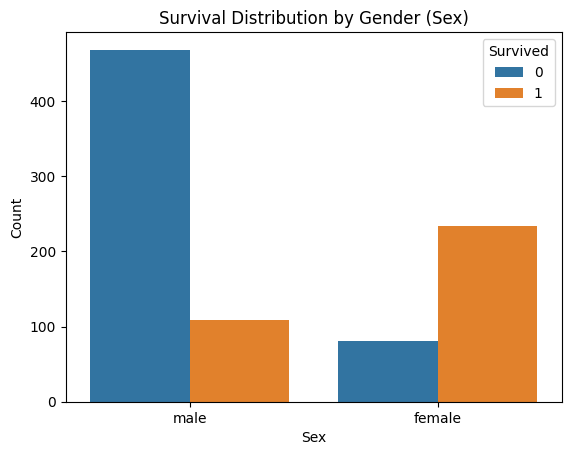

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the relationship between Sex and Survived
sns.countplot(data=df_train, x='Sex', hue='Survived')
plt.title("Survival Distribution by Gender (Sex)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


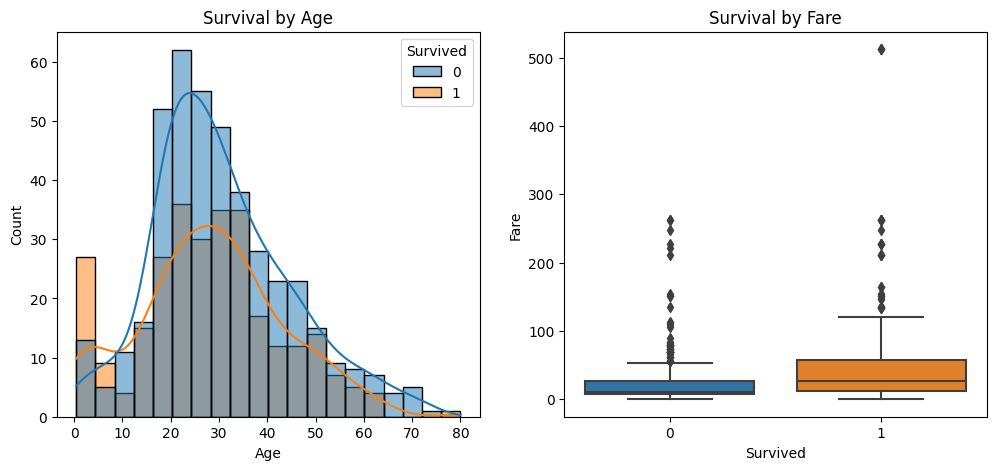

In [ ]:
# histograms for "Age" and box plots for "Fare" against "Survived"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True)
plt.title('Survival by Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, x='Survived', y='Fare')
plt.title('Survival by Fare')

plt.show()


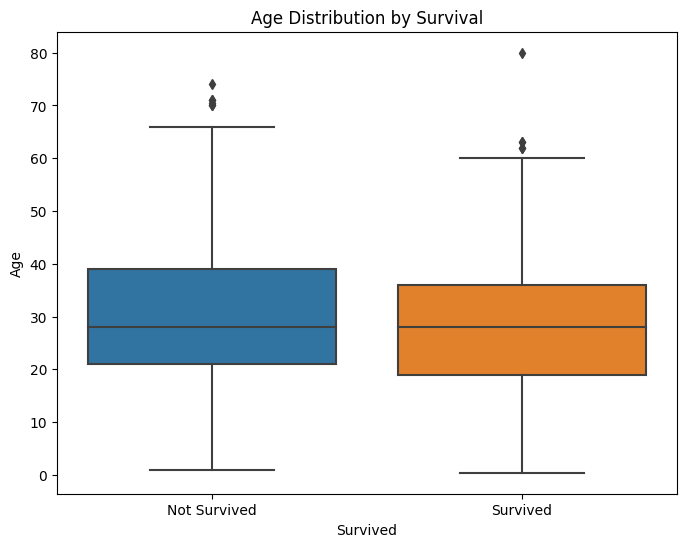

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# box plot to visualize the distribution of Age for Survived and Not Survived
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


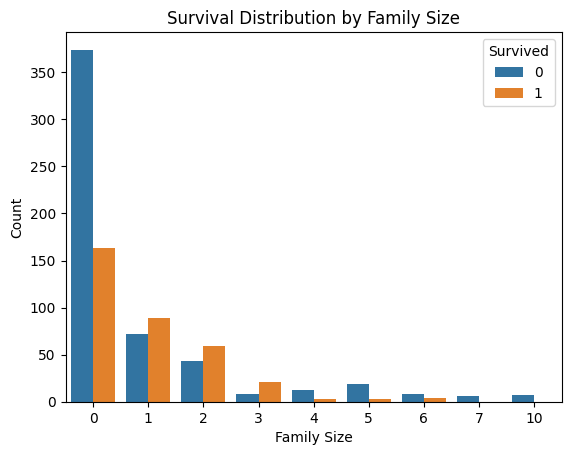

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new feature 'FamilySize' by summing 'SibSp' and 'Parch'
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']

#  countplot to visualize the relationship between FamilySize and Survived
sns.countplot(data=df_train, x='FamilySize', hue='Survived')
plt.title("Survival Distribution by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()


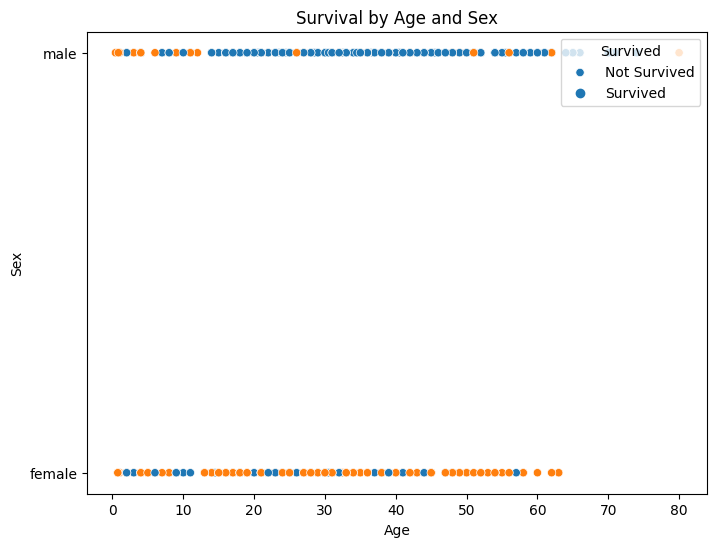

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot to visualize the relationship between Age, Sex, and Survived
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Age', y='Sex', hue='Survived', marker='o')
plt.title("Survival by Age and Sex")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.legend(title='Survived', labels=['Not Survived', 'Survived'], loc='upper right')
plt.show()


In [ ]:
import pandas as pd

#categorizes passengers based on age and sex
def categorize_age_gender(row):
    if row['Age'] < 14:
        return 'Child'
    elif row['Sex'] == 'female':
        return 'Female Adult'
    else:
        return 'Male Adult'


df_train['AgeGenderCategory'] = df_train.apply(categorize_age_gender, axis=1)
print(df_train[['Sex', 'Age', 'AgeGenderCategory']].head(10))


      Sex   Age AgeGenderCategory
0    male  22.0        Male Adult
1  female  38.0      Female Adult
2  female  26.0      Female Adult
3  female  35.0      Female Adult
4    male  35.0        Male Adult
5    male   NaN        Male Adult
6    male  54.0        Male Adult
7    male   2.0             Child
8  female  27.0      Female Adult
9  female  14.0      Female Adult


In [ ]:
import pandas as pd

# 'AgeCategory' where values are 'Child' if Age is less than 14, 'Adult' otherwise
df_train['AgeCategory'] = df_train['Age'].apply(lambda age: 'Child' if age < 14 else 'Adult')


print(df_train[['Age', 'AgeCategory']].head(10))
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)


    Age AgeCategory
0  22.0       Adult
1  38.0       Adult
2  26.0       Adult
3  35.0       Adult
4  35.0       Adult
5   NaN       Adult
6  54.0       Adult
7   2.0       Child
8  27.0       Adult
9  14.0       Adult


In [ ]:
nan_columns = df_train.isna().any()

# Display the columns with NaN values
print(nan_columns)

PassengerId          False
Survived             False
Pclass               False
Name                 False
Sex                  False
Age                  False
SibSp                False
Parch                False
Ticket               False
Fare                 False
Cabin                 True
Embarked              True
Title                False
FamilySize           False
AgeGenderCategory    False
AgeCategory          False
dtype: bool


In [ ]:
df_train['Cabin'].fillna('Unknown', inplace=True)


In [ ]:
len(df_test)

418

In [ ]:
# Feature Engineering: Family Size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
import re

# Extract titles from "Name" column
df_train['Title'] = df_train['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
df_test['Title'] = df_test['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,Mrs


In [3]:
#weaker model

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# df_train['Pclass'] = (df_train['Pclass'] - df_train['Pclass'].mean()) / df_train['Pclass'].std()
# df_train['Fare'] = (df_train['Fare'] - df_train['Fare'].mean())/df_train['Fare'].std()
# df_train['Age'] = (df_train['Age'] - df_train['Age'].mean())/df_train['Age'].std()
#test['Parch'] = (test['Parch'] - test['Parch'].mean())/test['Parch'].std()
#test['Sex'] = (test['Sex'] - test['Sex'].mean())/test['Sex'].std()
#test['Sex_male'] = (test['Sex_male'] - test['Sex_male'].mean())/test['Sex_male'].std()

X = pd.get_dummies(df_train[features], columns=['Embarked'], drop_first=True)
y = df_train['Survived']

# SimpleImputer to handle for missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict using the validation set and accuracy score
val_predictions = clf.predict(X_val)
val_accuracy = accuracy_score(val_predictions, y_val)
print('Validation Accuracy:', val_accuracy)


Validation Accuracy: 0.8156424581005587


In [ ]:
#our better model

import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# training and test datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Family Size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

# Regex search for title
df_train['Title'] = df_train['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
df_test['Title'] = df_test['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

#  missing values for 'Age' using the mean of the training data
mean_age = df_train['Age'].median()
df_train['Age'].fillna(mean_age, inplace=True)
df_test['Age'].fillna(mean_age, inplace=True)


columns_to_fill_with_0 = ['Fare']
for column in columns_to_fill_with_0:
    df_test[column].fillna(0, inplace=True)

#  'Age * Pclass' interaction feature
df_train['Age_Pclass'] = df_train['Age'] * df_train['Pclass']
df_test['Age_Pclass'] = df_test['Age'] * df_test['Pclass']

#CabinDeck from the 'Cabin' column
df_train['CabinDeck'] = df_train['Cabin'].str[0]
df_test['CabinDeck'] = df_test['Cabin'].str[0]

# CabinPort from the 'Cabin' column
df_train['CabinPort'] = df_train['Cabin'].str.extract(r'([A-Z])')
df_test['CabinPort'] = df_test['Cabin'].str.extract(r'([A-Z])')

# Normalization between the 'Age' and 'Age_Pclass' values using Scaler
scaler_age = StandardScaler()
df_train[['Age', 'Age_Pclass']] = scaler_age.fit_transform(df_train[['Age', 'Age_Pclass']])
df_test[['Age', 'Age_Pclass']] = scaler_age.transform(df_test[['Age', 'Age_Pclass']])

# catergorizing by age groups
def categorize_age(age):
    if age < 13:
        return 'Child'
    elif 12 < age <= 18:
        return 'Teen'
    elif 18 < age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df_train['AgeGroup'] = df_train['Age'].apply(categorize_age)
df_test['AgeGroup'] = df_test['Age'].apply(categorize_age)

# Encode categorical features and standardize the data
categorical_features = ['Sex', 'Title', 'AgeGroup', 'CabinDeck', 'CabinPort', 'Embarked']

df_train = pd.get_dummies(df_train, columns=categorical_features, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)

# Get the list of encoded columns for 'AgeGroup' from the training data, not test
age_group_columns = [col for col in df_train.columns if 'AgeGroup' in col]

# Ensure the test data has the same columns
for col in age_group_columns:
    if col not in df_test.columns:
        df_test[col] = 0

#adjust for missing columns (waja)
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0

# Combine feature columns
feature_columns = [
    'Pclass', 'Parch', 'FamilySize', 'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
    'Age_Pclass', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F',
    'CabinDeck_G', 'CabinDeck_T', 'CabinPort_B', 'CabinPort_C', 'CabinPort_D', 'CabinPort_E', 'CabinPort_F',
    'CabinPort_G', 'CabinPort_T', 'Embarked_Q', 'Embarked_S'
]

scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[feature_columns + age_group_columns])
X_test = scaler.transform(df_test[feature_columns + age_group_columns])

#logit (alan)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, df_train['Survived'])

# Make predictions for the test data using the logistic regression model
predictions = logistic_regression.predict(X_test)


result_df = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})








In [ ]:
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
actual_labels = pd.read_csv('gender_submission.csv')

merged_df = pd.merge(result_df, actual_labels, on='PassengerId')

accuracy = accuracy_score(merged_df['Survived_x'], merged_df['Survived_y'])
print('Accuracy Score:', accuracy)

Accuracy Score: 0.9258373205741627


In [4]:
print("our actual score on Kaggle was about 79%")

our actual score on Kaggle was about 79%


In [5]:
#we forgot which one we teseted got us 79% lol since it got lost in the google collab universe, we think model 2, may have overfitted a bit with out features

In [ ]:


# Prepare the submission DataFrame
#submission_df = pd.DataFrame({
#    'PassengerId': df_test['PassengerId'],
#    'Survived': predictions
#})

# Save the DataFrame to a CSV file
result_df.to_csv('submission12.csv', index=False)


In [ ]:
#project by Wajahat, Bryan, Alan, Harpeet, Zach